# Pandas Session - 2: Data Cleaning, Grouping, Merging

## 1. Setup & Data Loading

**Objective:** Understand DataFrame shape and inspect initial rows.

**Expected Outcome:** Familiarity with dataset size and columns.

In [1]:
import pandas as pd
df = pd.read_csv('/content/titanic.csv')
print('Dataset shape:', df.shape)
display(df.head())

Dataset shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    object 
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           714 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      889 non-null    object 
 12  NameLength    891 non-null    int64  
 13  SexBinary     891 non-null    int64  
 14  AboveAvgFare  891 non-null    bool   
dtypes: bool(1), float64(2), int64(6), object(6)
memory usage: 98.5+ KB


In [45]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,NameLength,SexBinary
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,26.965208,0.352413
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,9.281607,0.477990
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,20.000000,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,25.000000,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,30.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,82.000000,1.000000


In [46]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameLength,SexBinary,AboveAvgFare
886,887,No,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,21,0,False
887,888,Yes,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,28,1,False
888,889,No,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,40,1,False
889,890,Yes,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,21,0,False
890,891,No,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,19,0,False


## 2. Handling Missing Values (NaN)
Real-world data often has missing entries. Pandas represents these as `NaN` (Not a Number).

**Why it matters:**
- Missing data can skew analyses, cause errors in calculations, and lead to incorrect model training.
- We need strategies to detect and handle missing values consistently.

### 2.1 Detection
- `df.isnull()` returns a DataFrame of boolean values (`True` if missing).
- Summing this boolean mask per column gives count of missing.

In [48]:
missing_counts = df.isnull().sum()
print("Missing values per column:")
print(missing_counts)

Missing values per column:
PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
NameLength        0
SexBinary         0
AboveAvgFare      0
dtype: int64


### 2.2 Dropping Missing Values
**Approach:** Remove rows or columns with missing data.

- `df.dropna(how='any')`: Drops any row containing at least one `NaN`.
- `df.dropna(how='all')`: Drops only rows where **all** entries are `NaN`.

**When to use:**
- Dropping is quick but may remove important data if many values are missing.

In [3]:
df_drop_any = df.dropna(how='any')
print('Shape after dropping any missing:', df_drop_any.shape)

Shape after dropping any missing: (183, 12)


In [4]:
df_drop_all = df.dropna(how='all')
print('Shape after dropping all-missing rows:', df_drop_all.shape)

Shape after dropping all-missing rows: (891, 12)


### 2.3 Filling Missing Values
Filling missing values can preserve dataset size. Choices include:

- **Constant value**: e.g., `0` or `'Unknown'`.
- **Statistical fill**: mean, median for numerical; mode for categorical.
- **Method-based**: forward-fill (`ffill`) or backward-fill (`bfill`) to propagate adjacent values.

In [5]:
# Constant fill
df_const = df.fillna({'Age': 0, 'Embarked': 'Unknown'})
print("After constant fill:\n", df_const[['Age','Embarked']].head(5))

After constant fill:
     Age Embarked
0  22.0        S
1  38.0        C
2  26.0        S
3  35.0        S
4  35.0        S


In [6]:
# Statistical fill
age_mean = df['Age'].mean()
fare_median = df['Fare'].median()
embarked_mode = df['Embarked'].mode()[0]
df_stat = df.fillna({'Age': age_mean, 'Fare': fare_median, 'Embarked': embarked_mode})
print("\nAfter statistical fill, missing counts:")
print(df_stat.isnull().sum())


After statistical fill, missing counts:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
import numpy as np

df1 = pd.DataFrame([[np.nan, 2, np.nan, 0],
                    [3, 4, np.nan, 1],
                    [np.nan, np.nan, np.nan, np.nan],
                    [np.nan, 3, np.nan, 4]],
                    columns=list("ABCD"))
df1

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0


In [9]:
df1.ffill()

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,3.0,4.0,NaN,1.0
3,3.0,3.0,NaN,4.0


In [11]:
df1 = pd.DataFrame({'A': [1, None, None, 4], 'B': [None, 5, None, 7]})
df1

,A,B
0,1.0,NaN
1,NaN,5.0
2,NaN,NaN
3,4.0,7.0


In [12]:
df1.bfill()

,A,B
0,1.0,5.0
1,4.0,5.0
2,4.0,7.0
3,4.0,7.0


In [13]:
df1.bfill(limit=1)

,A,B
0,1.0,5.0
1,NaN,5.0
2,4.0,7.0
3,4.0,7.0


In [10]:
# Forward fill then backward fill
df_method = df.copy()
df_method['Age'] = df_method['Age'].fillna(method='ffill').fillna(method='bfill')
print("\nAfter method fill (ffill then bfill), Age head:")
print(df_method['Age'].head(10))
print("\nAfter method fill (ffill then bfill), missing Age:", df_method['Age'].isnull().sum())


After method fill (ffill then bfill), Age head:
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    35.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

After method fill (ffill then bfill), missing Age: 0


/tmp/ipython-input-10-1200109802.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_method['Age'] = df_method['Age'].fillna(method='ffill').fillna(method='bfill')


In [14]:
# Backward fill then forward fill
df_bfill = df.copy()
df_bfill['Age'] = df_bfill['Age'].fillna(method='bfill')
df_bfill['Age'] = df_bfill['Age'].fillna(method='ffill')
print(df_bfill['Age'].head(10))
print("\nAfter method fill (bfill then ffill), missing Age:", df_bfill['Age'].isnull().sum())

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    54.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

After method fill (bfill then ffill), missing Age: 0


/tmp/ipython-input-14-2447485261.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill['Age'] = df_bfill['Age'].fillna(method='bfill')
/tmp/ipython-input-14-2447485261.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill['Age'] = df_bfill['Age'].fillna(method='ffill')


## 3. Sorting & Filtering
Organizing and subsetting data helps in analysis and visualization.

### 3.1 Sorting
- `df.sort_values(by='col', ascending=True/False)` reorders rows based on column values.
- Sorting can be multi-key with `by=[col1, col2]` and corresponding `ascending=[True,False]`.

In [15]:
# Single-column sort by Fare
df_sorted_fare = df.sort_values(by='Fare', ascending=False)
print("Top 5 fares:")
print(df_sorted_fare[['Name','Fare']].head(5))

Top 5 fares:
                                   Name      Fare
679  Cardeza, Mr. Thomas Drake Martinez  512.3292
258                    Ward, Miss. Anna  512.3292
737              Lesurer, Mr. Gustave J  512.3292
88           Fortune, Miss. Mabel Helen  263.0000
438                   Fortune, Mr. Mark  263.0000


In [16]:
# Multi-column sort: Pclass asc, Age desc
df_sorted_multi = df.sort_values(by=['Pclass','Age'], ascending=[True,False])
print("\nTop entries by class and age:")
print(df_sorted_multi[['Name','Pclass','Age']].head(5))


Top entries by class and age:
                                     Name  Pclass   Age
630  Barkworth, Mr. Algernon Henry Wilson       1  80.0
96              Goldschmidt, Mr. George B       1  71.0
493               Artagaveytia, Mr. Ramon       1  71.0
745          Crosby, Capt. Edward Gifford       1  70.0
54         Ostby, Mr. Engelhart Cornelius       1  65.0


### 3.2 Filtering
- Use boolean masks: `df[condition]`.
- Combine conditions with `&`, `|`, and parentheses.

In [17]:
# Age > 60
older = df[df['Age'] > 60]
print("Passengers older than 60:", older.shape[0])

Passengers older than 60: 22


In [18]:
# Names containing 'Smith'
smiths = df[df['Name'].str.contains('Smith', na=False)]
print("Names with 'Smith':")
print(smiths[['Name']].head())

Names with 'Smith':
                           Name
174     Smith, Mr. James Clinch
260           Smith, Mr. Thomas
284  Smith, Mr. Richard William
346   Smith, Miss. Marion Elsie


In [19]:
# Combined conditions: female, Pclass 1, Fare > 100
sel = df[(df['Sex']=='female') & (df['Pclass']==1) & (df['Fare']>100)]
print("\nFemale, 1st class, fare>100:")
print(sel[['Name','Sex','Pclass','Fare']])


Female, 1st class, fare>100:
                                                  Name     Sex  Pclass  \
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female       1   
88                          Fortune, Miss. Mabel Helen  female       1   
195                               Lurette, Miss. Elise  female       1   
215                            Newell, Miss. Madeleine  female       1   
258                                   Ward, Miss. Anna  female       1   
268      Graham, Mrs. William Thompson (Edith Junkins)  female       1   
269                             Bissette, Miss. Amelia  female       1   
297                       Allison, Miss. Helen Loraine  female       1   
299    Baxter, Mrs. James (Helene DeLaudeniere Chaput)  female       1   
306                            Fleming, Miss. Margaret  female       1   
307  Penasco y Castellana, Mrs. Victor de Satode (M...  female       1   
311                         Ryerson, Miss. Emily Borie  female       1   
318     

In [20]:
older = df[df['Age']>60]
johns = df[df['Name'].str.contains('John', na=False)]
sel = df[(df['Sex']=='female')&(df['Pclass']==1)&(df['Fare']>100)]
print(len(older))

22


In [21]:
print(johns.head())

    PassengerId  Survived  Pclass  \
1             2         1       1   
8             9         1       3   
41           42         0       2   
45           46         0       3   
98           99         1       2   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
41  Turpin, Mrs. William John Robert (Dorothy Ann ...  female  27.0      1   
45                           Rogers, Mr. William John    male   NaN      0   
98               Doling, Mrs. John T (Ada Julia Bone)  female  34.0      0   

    Parch           Ticket     Fare Cabin Embarked  
1       0         PC 17599  71.2833   C85        C  
8       2           347742  11.1333   NaN        S  
41      0            11668  21.0000   NaN        S  
45      0  S.C./A.4. 23567   8.0500   NaN        S  
98      1           231919  23.0000   NaN  

In [22]:
print(sel.head())

     PassengerId  Survived  Pclass  \
31            32         1       1   
88            89         1       1   
195          196         1       1   
215          216         1       1   
258          259         1       1   

                                               Name     Sex   Age  SibSp  \
31   Spencer, Mrs. William Augustus (Marie Eugenie)  female   NaN      1   
88                       Fortune, Miss. Mabel Helen  female  23.0      3   
195                            Lurette, Miss. Elise  female  58.0      0   
215                         Newell, Miss. Madeleine  female  31.0      1   
258                                Ward, Miss. Anna  female  35.0      0   

     Parch    Ticket      Fare        Cabin Embarked  
31       0  PC 17569  146.5208          B78        C  
88       2     19950  263.0000  C23 C25 C27        S  
195      0  PC 17569  146.5208          B80        C  
215      0     35273  113.2750          D36        C  
258      0  PC 17755  512.3292         

In [23]:
youth_senior = df.query('Age<18 or Age>60')
print(len(youth_senior))
print(youth_senior.head())

135
    PassengerId  Survived  Pclass                                  Name  \
7             8         0       3        Palsson, Master. Gosta Leonard   
9            10         1       2   Nasser, Mrs. Nicholas (Adele Achem)   
10           11         1       3       Sandstrom, Miss. Marguerite Rut   
14           15         0       3  Vestrom, Miss. Hulda Amanda Adolfina   
16           17         0       3                  Rice, Master. Eugene   

       Sex   Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
7     male   2.0      3      1   349909  21.0750   NaN        S  
9   female  14.0      1      0   237736  30.0708   NaN        C  
10  female   4.0      1      1  PP 9549  16.7000    G6        S  
14  female  14.0      0      0   350406   7.8542   NaN        S  
16    male   2.0      4      1   382652  29.1250   NaN        Q  


## 4. GroupBy
Grouping and aggregating data simplifies understanding of grouped statistics.

- Syntax: `df.groupby('key').agg({'col1':'func','col2':'func2'})`.

In [24]:
# Mean Age and Fare by Pclass
agg_class = df.groupby('Pclass').agg({'Age':'mean','Fare':'mean','Survived':'sum'})
print("Aggregated by Pclass:")
print(agg_class)

Aggregated by Pclass:
              Age       Fare  Survived
Pclass                                
1       38.233441  84.154687       136
2       29.877630  20.662183        87
3       25.140620  13.675550       119


In [25]:
# Survival rate by Embarked
surv_rate = df.groupby('Embarked')['Survived'].mean()
print("\nSurvival rate by Embarked:")
print(surv_rate)


Survival rate by Embarked:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


In [43]:
# Groupby multiple columns
df3 = pd.DataFrame({
    'A': ['foo','foo','bar','bar','foo'],
    'B': ['one','two','one','two','one'],
    'C': [1,2,3,4,5]
})
grouped = df3.groupby(['A','B']).sum()
print(grouped)

         C
A   B     
bar one  3
    two  4
foo one  6
    two  2


## 5. Combining DataFrames
### 5.1 Merge
- Performs database-style join operations.
`pd.merge(df1, df2, on='key', how='left')`.

### 5.2 Concat
- Stacks DataFrames along rows or columns.
`pd.concat([df1, df2], axis=0)`.

In [26]:
#inner merge
df1 = pd.DataFrame({'key': ['K1','K2','K3'], 'A':[1,2,3]})
df2 = pd.DataFrame({'key': ['K1','K2','K4'], 'B':[4,5,6]})
merged_inner = pd.merge(df1, df2, on='key', how='inner')
print(merged_inner)

  key  A  B
0  K1  1  4
1  K2  2  5


In [27]:
# left join
merged_left = pd.merge(df1, df2, on='key', how='left')
print(merged_left)

  key  A    B
0  K1  1  4.0
1  K2  2  5.0
2  K3  3  NaN


In [28]:
# outer join
merged_outer = pd.merge(df1, df2, on='key', how='outer')
print(merged_outer)

  key    A    B
0  K1  1.0  4.0
1  K2  2.0  5.0
2  K3  3.0  NaN
3  K4  NaN  6.0


In [29]:
# Merging on different columns
df3 = pd.DataFrame({'k1': ['X','Y'], 'val1':[7,8]})
df4 = pd.DataFrame({'k2': ['X','Z'], 'val2':[9,10]})
merged_diff = pd.merge(df3, df4, left_on='k1', right_on='k2', how='inner')
print(merged_diff)

  k1  val1 k2  val2
0  X     7  X     9


In [30]:
# Concatenating vercally(Stacking)
dfA = pd.DataFrame({'v':[1,2]})
dfB = pd.DataFrame({'v':[3,4]})
concat_vert = pd.concat([dfA, dfB], axis=0)
print(concat_vert)

   v
0  1
1  2
0  3
1  4


In [31]:
# Concatenating horizontally
dfX = pd.DataFrame({'A':[1,2]})
dfY = pd.DataFrame({'B':[3,4]})
concat_horiz = pd.concat([dfX, dfY], axis=1)
print(concat_horiz)

   A  B
0  1  3
1  2  4


In [32]:
# Joining on index
dfL = pd.DataFrame({'val':[10,20]}, index=['a','b'])
dfR = pd.DataFrame({'val2':[30,40]}, index=['b','c'])
joined = dfL.join(dfR, how='outer')
print(joined)

    val  val2
a  10.0   NaN
b  20.0  30.0
c   NaN  40.0


In [33]:
# Merge names with tickets
names = df[['PassengerId','Name']]
tickets = df[['PassengerId','Ticket']]
merged = pd.merge(names, tickets, on='PassengerId', how='left')
print("Merged head:")
print(merged.head())

Merged head:
   PassengerId                                               Name  \
0            1                            Braund, Mr. Owen Harris   
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3                             Heikkinen, Miss. Laina   
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5                           Allen, Mr. William Henry   

             Ticket  
0         A/5 21171  
1          PC 17599  
2  STON/O2. 3101282  
3            113803  
4            373450  


In [34]:
# Concat survivors and non-survivors
survived = df[df['Survived']==1]
not_survived = df[df['Survived']==0]
combined = pd.concat([survived, not_survived], axis=0, ignore_index=True)
print("Combined shape:", combined.shape)
print("Combined head:", combined.head())

Combined shape: (891, 12)
Combined head:    PassengerId  Survived  Pclass  \
0            2         1       1   
1            3         1       3   
2            4         1       1   
3            9         1       3   
4           10         1       2   

                                                Name     Sex   Age  SibSp  \
0  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
1                             Heikkinen, Miss. Laina  female  26.0      0   
2       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
4                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0          PC 17599  71.2833   C85        C  
1      0  STON/O2. 3101282   7.9250   NaN        S  
2      0            113803  53.1000  C123        S  
3      2            347742  11.1333   NaN        S  
4      0      

## 6. Indexing: `iloc` vs `loc`
- `iloc`: integer-based position indexing.
- `loc`: label-based indexing by index and column names.

In [35]:
# iloc: first 3 rows, first 4 cols
print(df.iloc[:3, :4])

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name  
0                            Braund, Mr. Owen Harris  
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  
2                             Heikkinen, Miss. Laina  


In [36]:
# loc: rows labeled 0 to 2, specific columns
print(df.loc[0:2, ['Name','Age','Fare']])

                                                Name   Age     Fare
0                            Braund, Mr. Owen Harris  22.0   7.2500
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0  71.2833
2                             Heikkinen, Miss. Laina  26.0   7.9250


## 7. Applying Functions & Mapping
- `apply`: apply function element- or row-wise.
- `map`: substitute based on mapping dict or Series.

In [37]:
# apply: calculate name length
df['NameLength'] = df['Name'].apply(len)
print(df[['Name','NameLength']].head())

                                                Name  NameLength
0                            Braund, Mr. Owen Harris          23
1  Cumings, Mrs. John Bradley (Florence Briggs Th...          51
2                             Heikkinen, Miss. Laina          22
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)          44
4                           Allen, Mr. William Henry          24


In [38]:
# map: convert gender to binary
df['SexBinary'] = df['Sex'].map({'male':0,'female':1})
print(df[['Sex','SexBinary']].head())

      Sex  SexBinary
0    male          0
1  female          1
2  female          1
3  female          1
4    male          0


## 8. Modifying Columns
- **Create new column:** direct assignment.
- **Update existing column:** reassign values.

In [39]:
# Create 'AboveAvgFare' flag
avg_fare = df['Fare'].mean()
df['AboveAvgFare'] = df['Fare'] > avg_fare
print(df[['Fare','AboveAvgFare']].head())

      Fare  AboveAvgFare
0   7.2500         False
1  71.2833          True
2   7.9250         False
3  53.1000          True
4   8.0500         False


In [40]:
# Update Survived to 'Yes'/'No'
df['Survived'] = df['Survived'].map({0:'No',1:'Yes'})
print(df[['Name','Survived']].head())

                                                Name Survived
0                            Braund, Mr. Owen Harris       No
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      Yes
2                             Heikkinen, Miss. Laina      Yes
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      Yes
4                           Allen, Mr. William Henry       No


## 9. Saving Data
- CSV: interoperability with other tools.
- Excel: for spreadsheets.

In [41]:
# Save to CSV and Excel
df.to_csv('titanic_detailed.csv', index=False)
df.to_excel('titanic_detailed.xlsx', index=False)
print("Files saved successfully.")

Files saved successfully.


## 10. Outlier Detection (IQR Method)
Outliers are extreme values. The IQR method identifies them robustly.

**Procedure:**
1. Compute Q1 and Q3 (25th & 75th percentiles).
2. IQR = Q3 - Q1.
3. Lower/upper bounds = Q1 - 1.5*IQR, Q3 + 1.5*IQR.
4. Filter rows outside bounds.

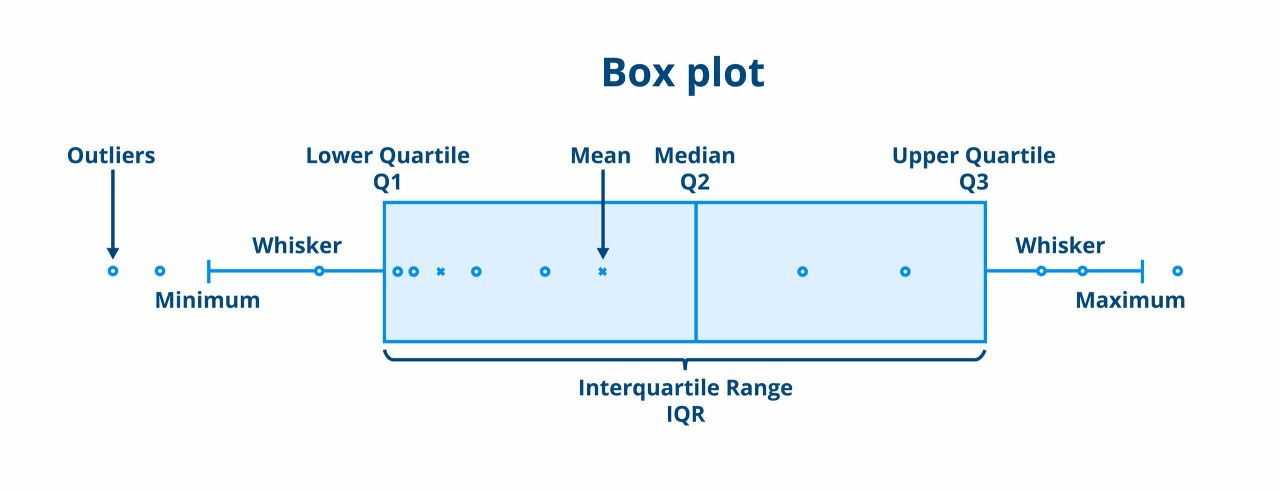

In [42]:
# Compute and detect outliers for numeric columns
for col in ['Age','Fare']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: detected", len(outliers), "outliers; bounds:", lower, upper)

Age: detected 11 outliers; bounds: -6.6875 64.8125
Fare: detected 116 outliers; bounds: -26.724 65.6344
